Классная работа

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


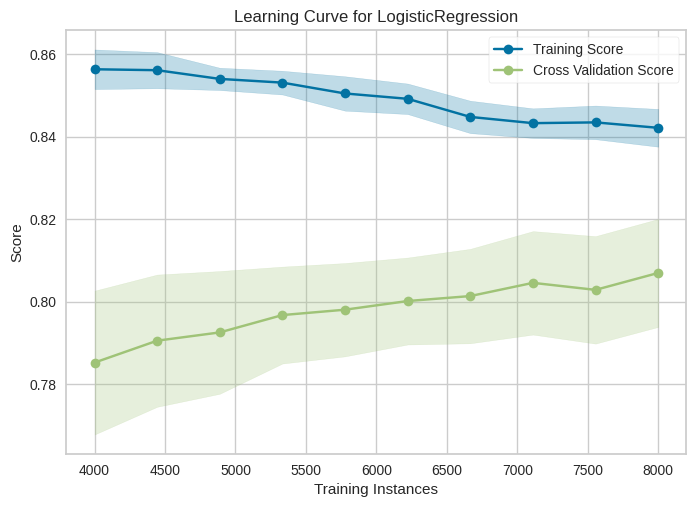

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


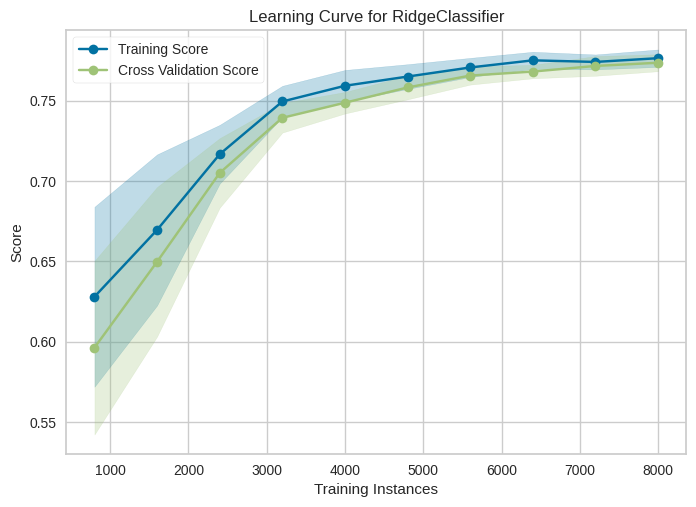

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

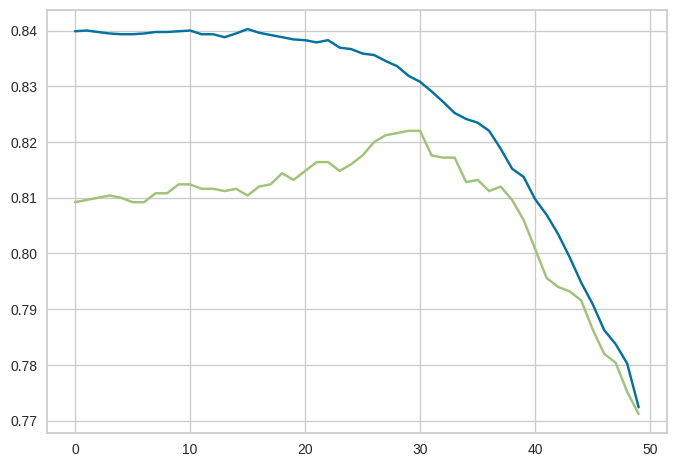

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests);

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


Диагностика моделей регрессии

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = np.asarray(dataset[:,:-1])
y = np.asarray(dataset[:,-1])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.9521
Test score: 0.6075


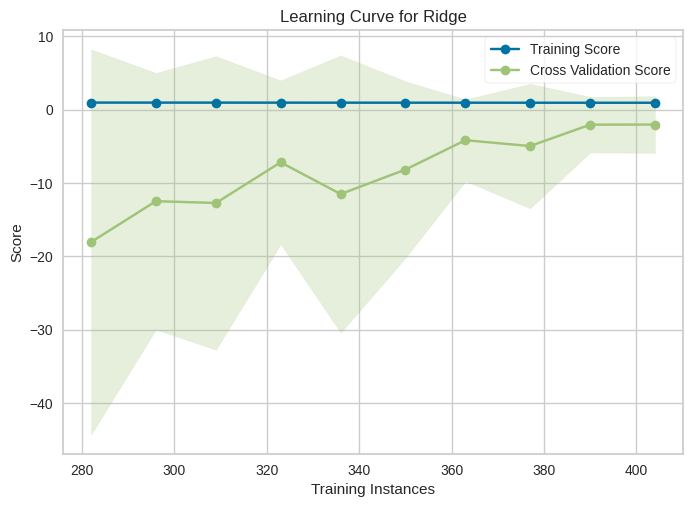

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

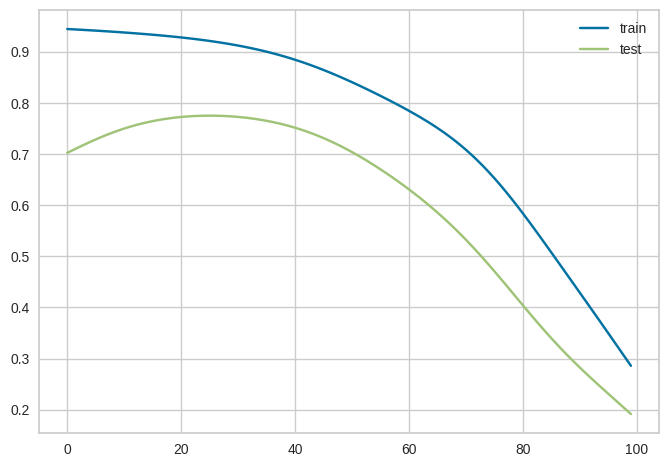

In [ ]:
from sklearn.linear_model import Ridge
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [ ]:
alpha = np.logspace(-2, 3, 100)[25]
lr = Ridge(alpha=alpha).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


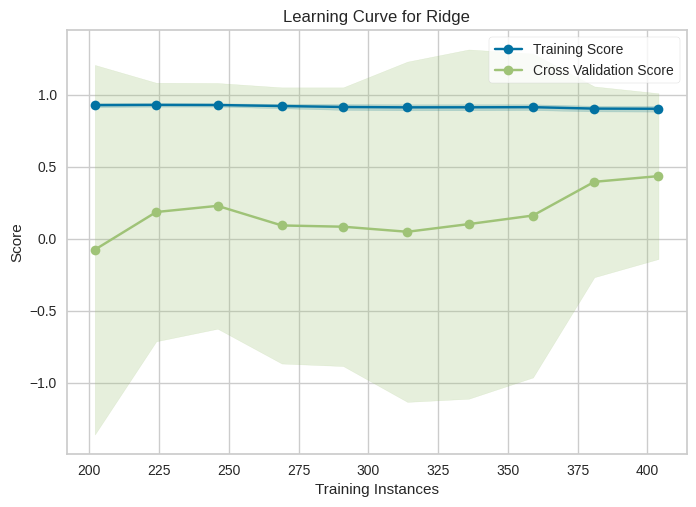

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.355e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.894e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.216e+02, tolerance: 3.233e

Ellipsis

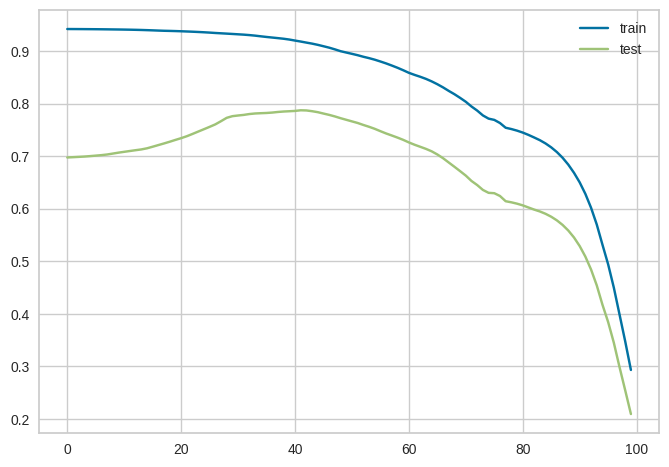

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
...

Диагностика на реальных данных

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


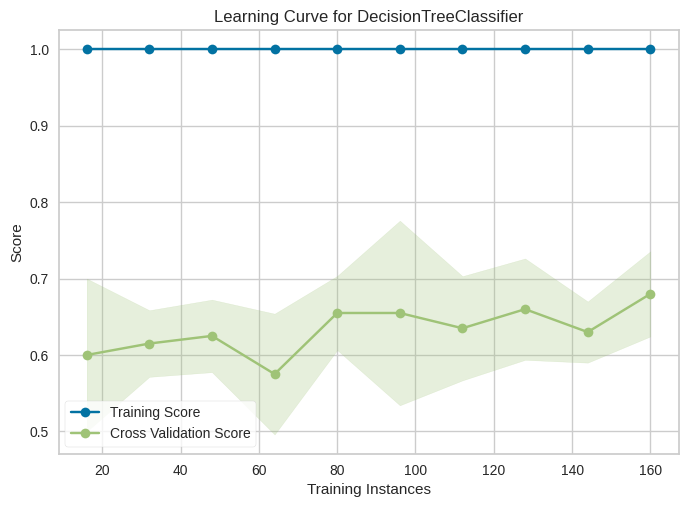

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

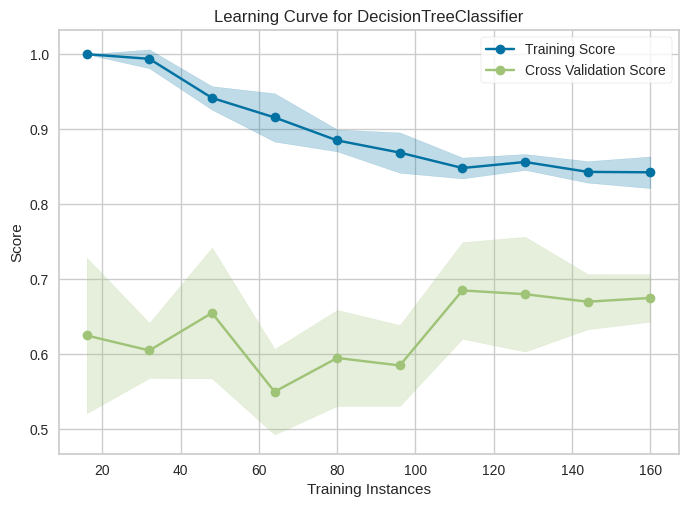

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth = 4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
model = DecisionTreeClassifier(random_state=1, max_depth = 4).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8500
Test score = 0.6250


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1,max_depth = 5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8420
Test score = 0.7987


Диагностика недообучения

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


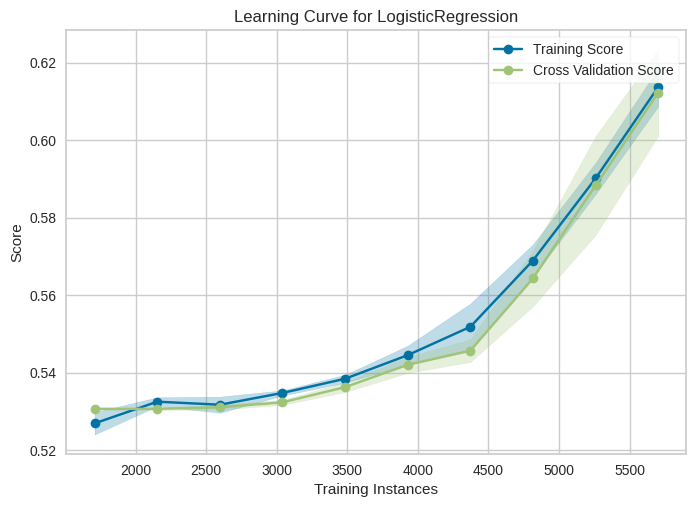

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9386
Test score = 0.9404


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

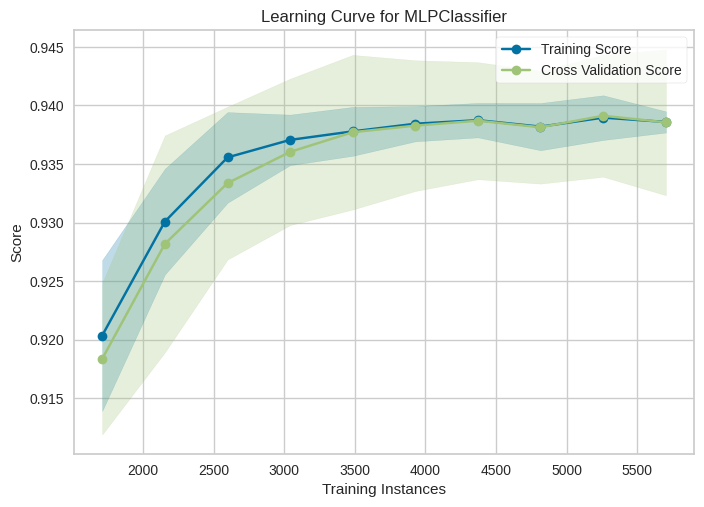

In [ ]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


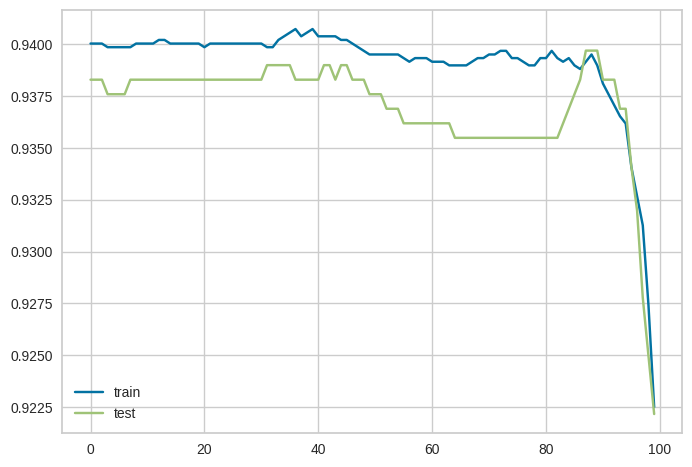

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Домашняя Работа

# 1
Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='kropt', version=1)

data.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(28056, 6)

Классифицируйте шахматную партию по положению белого короля, белой ладьи и черного короля. Сколько ходов до мата или ничья

In [ ]:
data['DESCR']

'Classify a chess game based on the position of the white king, the white rook and the black king.\n\nDownloaded from openml.org.'

In [ ]:
data.data.head()

,white_king_col,white_king_row,white_rook_col,white_rook_row,black_king_col,black_king_row
0,a,1,b,3,c,2
1,a,1,c,1,c,2
2,a,1,c,1,d,1
3,a,1,c,1,d,2
4,a,1,c,2,c,1


In [ ]:
X, y = data.data, data.target

In [ ]:
mapping_letters = {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    'e': 5,
    'f': 6,
    'g': 7,
    'h': 8
}

X['white_king_col_enc'] = [mapping_letters[item] for item in X['white_king_col']]
X['white_rook_col_enc'] = [mapping_letters[item] for item in X['white_king_col']]
X['black_king_col_enc'] = [mapping_letters[item] for item in X['white_king_col']]

In [ ]:
mapping = {
    'draw': 0,
    'zero': 1,
    'one': 2,
    'two': 3,
    'three': 4,
    'four': 5,
    'five': 6,
    'six': 7,
    'seven': 8,
    'eight': 9,
    'nine': 10,
    'ten': 11,
    'eleven': 12,
    'twelve': 13,
    'thirteen': 14,
    'fourteen': 15,
    'fifteen': 16,
    'sixteen': 17
}

y = [mapping[item] for item in y]

In [ ]:
X = X.drop(columns = ['white_king_col', 'white_rook_col', 'black_king_col'])

In [ ]:
set(data.target)

{'draw',
 'eight',
 'eleven',
 'fifteen',
 'five',
 'four',
 'fourteen',
 'nine',
 'one',
 'seven',
 'six',
 'sixteen',
 'ten',
 'thirteen',
 'three',
 'twelve',
 'two',
 'zero'}

In [ ]:
X = X.astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
lr = LogisticRegression(max_iter=60).fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Training precision_score: {precision_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Test precision_score: {precision_score(y_test, y_pred, average='weighted'):.4f}, '\n'")

print(f"Training recall_score: {recall_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Test recall_score: {recall_score(y_test, y_pred, average='weighted'):.4f}, '\n'")

print(f"Training f1_score: {f1_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Test f1_score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Training precision_score: 0.2227
Test precision_score: 0.2152, '
'
Training recall_score: 0.2644
Test recall_score: 0.2668, '
'
Training f1_score: 0.2112
Test f1_score: 0.2103


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


При недообучении регуляризация не поможет, даже навредит, так как еще усилит его. Поэтому единственный путь в этом случае - использовать более сложные, вариативные модели.

precision

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import get_scorer_names

from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


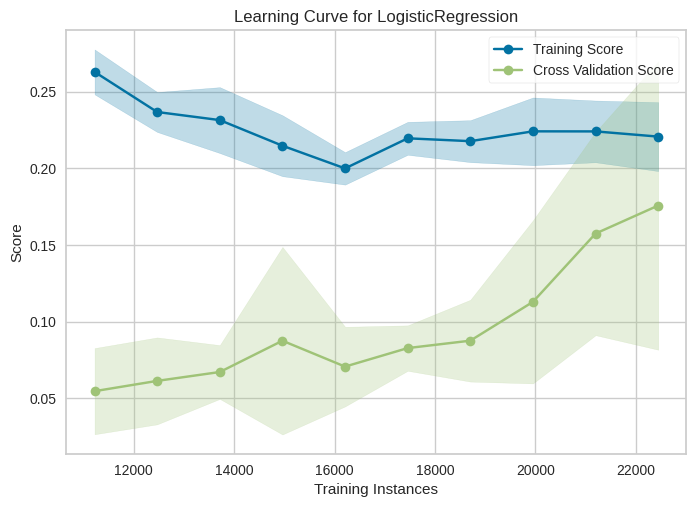

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(max_iter=60), train_sizes=np.linspace(0.5, 1.0, 10),
    scoring='precision_weighted'
).fit(X, y).show()

recall

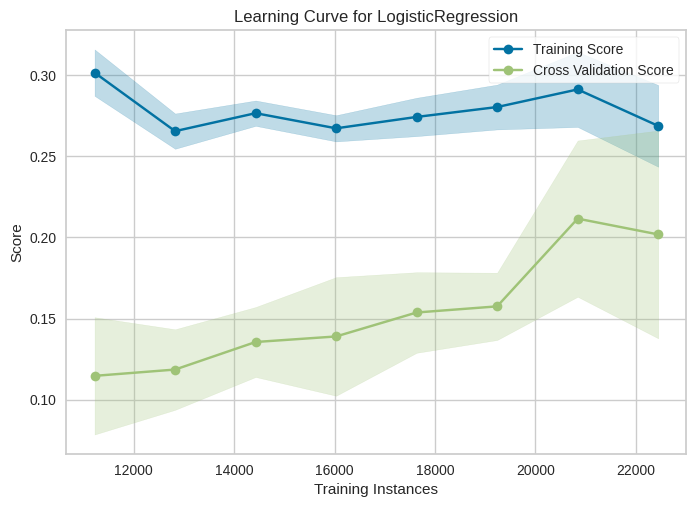

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(max_iter=60), train_sizes=np.linspace(0.5, 1.0, 8),
    scoring='recall_weighted'
).fit(X, y).show()

f1

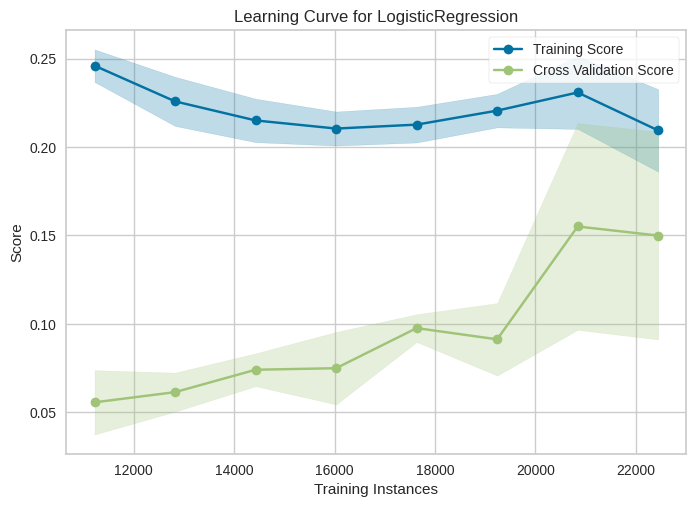

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(max_iter=60), train_sizes=np.linspace(0.5, 1.0, 8),
    scoring='f1_weighted'
).fit(X, y).show()

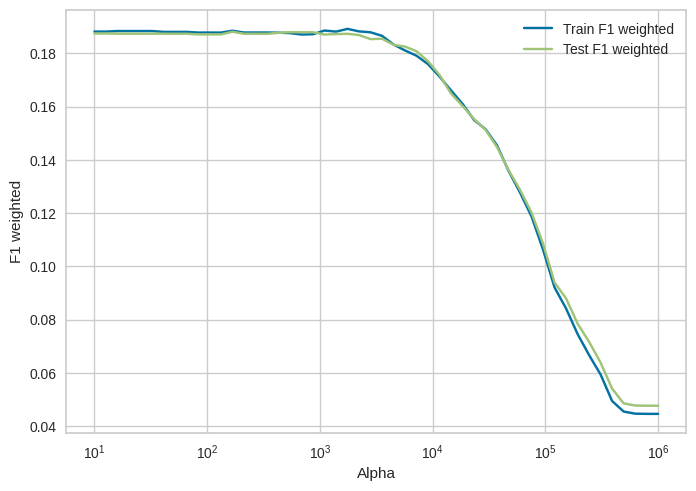

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

trains = []
tests = []

alphas = np.logspace(1, 6, 50)

for i in alphas:
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)

    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    trains.append(f1_train)
    tests.append(f1_test)

plt.plot(alphas, trains, label='Train F1 weighted')
plt.plot(alphas, tests, label='Test F1 weighted')
plt.xlabel('Alpha')
plt.ylabel('F1 weighted')
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
max(tests)

0.18810475211573274

In [ ]:
ridge = RidgeClassifier(alpha=2000).fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
f1_train, f1_test

(0.18894147749429027, 0.18770079894448682)

 многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
print("Train score = %.4f" % f1_score(y_train, y_train_pred, average='weighted'))
print("Test score = %.4f" % f1_score(y_test, y_pred, average='weighted'))

Train score = 0.3454
Test score = 0.3292


# 2

Повторите диагностику модели регрессии с использованием других видов моделей:
метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
метода ближайших соседей (исследуйте влияние количества соседей)
метода решающих деревьев (гиперпараметры по вашему выбору)

метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

In [ ]:
from sklearn.svm import SVR

svm = SVR().fit(X_train, y_train)

print(f"SVM Training score: {svm.score(X_train, y_train):.4f}")
print(f"SVM Test score: {svm.score(X_test, y_test):.4f}")

SVM Training score: 0.1489
SVM Test score: 0.1413


Недообучение

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

trains = []
tests = []
for i in np.logspace(-3, 2, 5):
  model = SVR(C = i).fit(X_train, y_train)
  trains.append(model.score(X_train, y_train))
  tests.append(model.score(X_test, y_test))
  print(i)

0.001
0.01778279410038923
0.31622776601683794
5.623413251903491
100.0


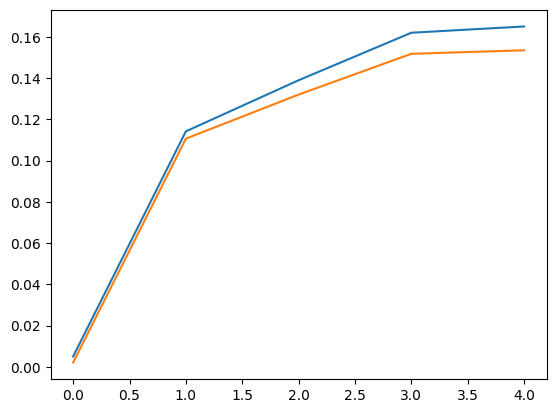

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
trains = []
tests = []
for i in np.linspace(90, 200, 3):
  model = SVR(C = i).fit(X_train, y_train)
  trains.append(model.score(X_train, y_train))
  tests.append(model.score(X_test, y_test))
  print(i)

90.0
145.0
200.0


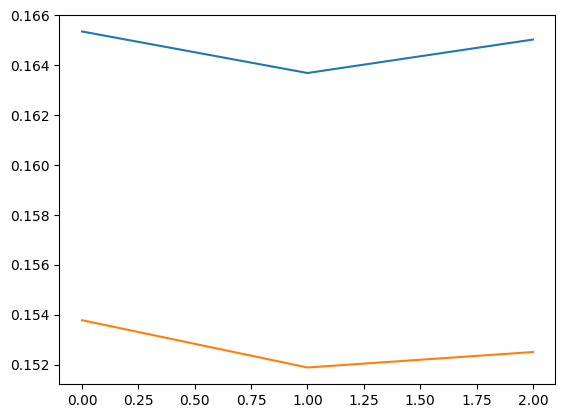

In [ ]:
plt.plot(trains)
plt.plot(tests);

Метод К ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

trains = []
tests = []
for i in np.logspace(0, 3, 8):
  knn = KNeighborsRegressor(n_neighbors=int(i)).fit(X_train, y_train)
  trains.append(knn.score(X_train, y_train))
  tests.append(knn.score(X_test, y_test))
  print(int(i))

1
2
7
19
51
138
372
1000


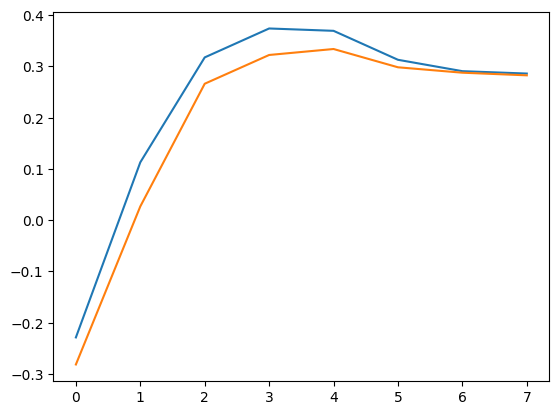

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
trains = []
tests = []
for i in np.linspace(30, 60, 7):
  knn = KNeighborsRegressor(n_neighbors=int(i)).fit(X_train, y_train)
  trains.append(knn.score(X_train, y_train))
  tests.append(knn.score(X_test, y_test))
  print(int(i))

30
35
40
45
50
55
60


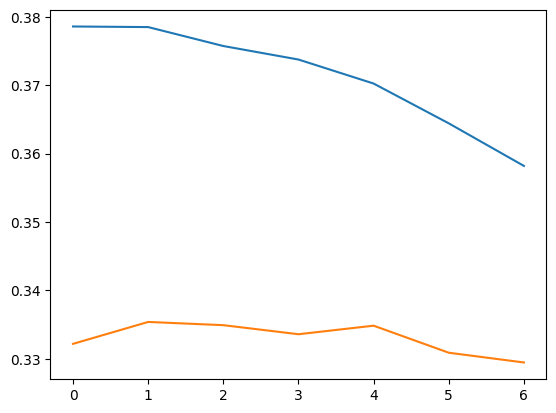

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
knn = KNeighborsRegressor(n_neighbors=50).fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.3702400955383066, 0.3348300600030497)

оптимальное кол-во соседей: 50

Метод решающих деревьев

In [ ]:
from sklearn.tree import DecisionTreeRegressor
trains = []
tests = []
for i in np.logspace(0, 3, 10):
  tree = DecisionTreeRegressor(max_depth=int(i)).fit(X_train, y_train)
  trains.append(tree.score(X_train, y_train))
  tests.append(tree.score(X_test, y_test))
  print(int(i))

1
2
4
10
21
46
100
215
464
1000


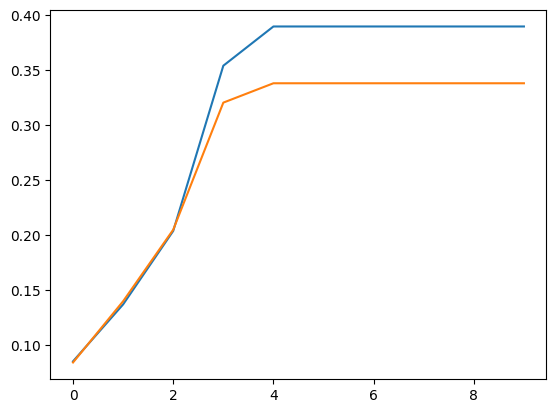

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
int(np.logspace(0, 3, 10)[np.argmax(tests)])

21

In [ ]:
tree = DecisionTreeRegressor(max_depth=21).fit(X_train, y_train)
print(' train score: %.4f' % tree.score(X_train, y_train),
'\n test score: %.4f' % tree.score(X_test, y_test),
'\n all dataset score: %.4f' % tree.score(X, y))

 train score: 0.3897 
 test score: 0.3381 
 all dataset score: 0.3766


Оптимальное значение при max_depth=21

# 3
Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

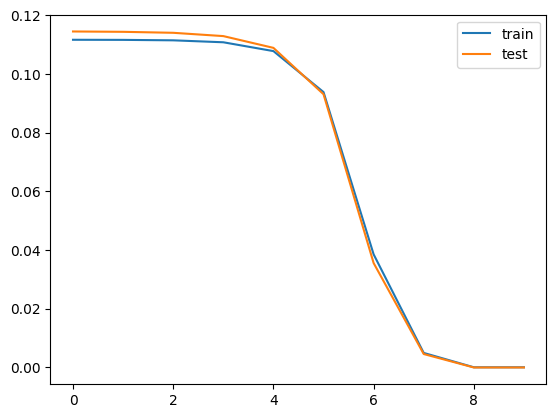

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-2, 1, 10):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

<ipython-input-53-392df01fbeab>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ridge = Lasso(alpha=i).fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e+05, tolerance: 4.501e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


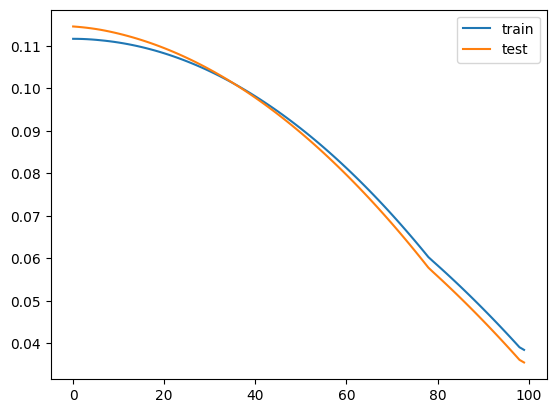

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.linspace(0, 1, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [ ]:
ridge = Lasso(alpha=0).fit(X_train, y_train)
ridge.score(X_train, y_train),ridge.score(X_test, y_test)

0.1116 0.1145


In [ ]:
dataset = np.genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X_B = dataset[:,:-1]
y_B = dataset[:,-1]
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B, test_size=0.25, random_state=0)

<ipython-input-66-19f49fbb6e40>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ridge = Lasso(alpha=i).fit(X_train_B, y_train_B)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3

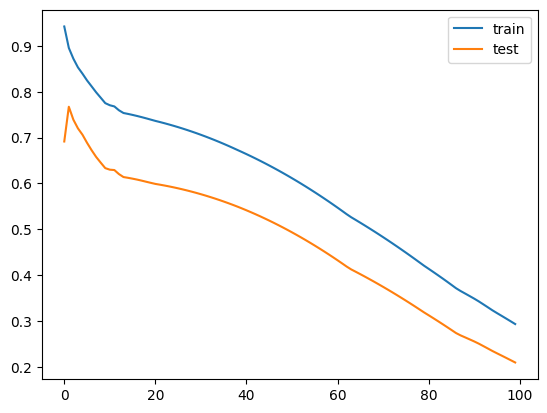

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.linspace(0, 1, 100):
  ridge = Lasso(alpha=i).fit(X_train_B, y_train_B)
  trains.append(ridge.score(X_train_B, y_train_B))
  tests.append(ridge.score(X_test_B, y_test_B))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [ ]:
print('Оптимальное альфа = ',np.linspace(0, 1, 100)[tests.index(max(tests))])

Оптимальное альфа =  0.010101010101010102


# 4
В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [ ]:
from sklearn.linear_model import ElasticNet
tests = []
trains = []
alphas = np.logspace(0, 100, 10)
l1_ratios = np.linspace(0, 1.0, 10)

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_train, y_train)
        trains.append(elastic_net.score(X_train, y_train))
        tests.append(elastic_net.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+05, tolerance: 4.501e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


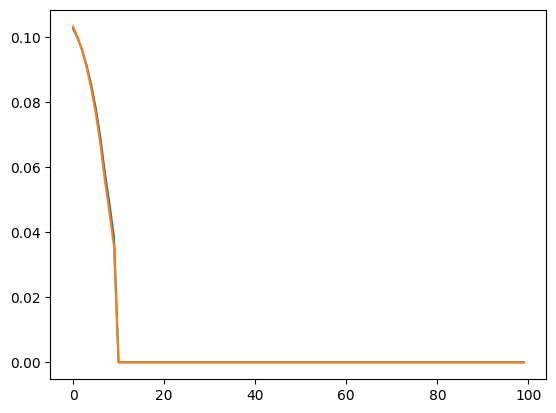

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
np.argmax(tests)

0

# 5
Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

trains = []
tests = []
for i in np.logspace(0, 3, 10):
  tree = DecisionTreeRegressor(max_depth=int(i)).fit(X_train, y_train)
  y_train_pred = tree.predict(X_train)
  y_pred = tree.predict(X_test)
  trains.append(f1_score(y_train, y_train_pred, average='weighted'))
  tests.append(f1_score(y_test, y_pred, average='weighted'))
  print(int(i))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
plt.plot(trains)
plt.plot(tests);

In [ ]:
int(np.logspace(0, 3, 10)[np.argmax(tests)])

In [ ]:
tree = DecisionTreeRegressor(max_depth=21).fit(X_train, y_train)
print(' train score: %.4f' % tree.score(X_train, y_train),
'\n test score: %.4f' % tree.score(X_test, y_test),
'\n all dataset score: %.4f' % tree.score(X, y))

In [ ]:
print(f"Training f1_score: {f1_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Test f1_score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

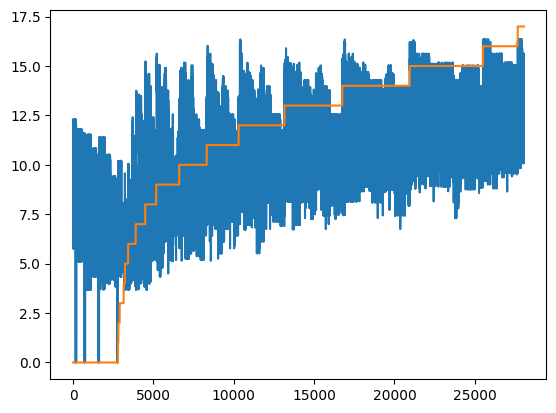

In [ ]:
tree = DecisionTreeRegressor(max_depth=21).fit(X, y)
plt.plot(tree.predict(X))
plt.plot(y);